# Digitale Techniken: Some data analysis code for weatherstation data
January 2022, J. Kerch

### Before the analysis: consider metadata of all the measurements
- which data is matching your own measurement period?
- which data are outdoor/indoor measurements?
- which data do you think is interesting to look at or comparable with your own data?
- collect coordinates of all measurements (3 columns: lat/long/owner, make sure you use the required format for the coordinates, might need to convert)

In [1]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from io import StringIO

### Assess the data before accessing it, split data with multiple data sets in single files

In [2]:
# create path to data in txt format
# get files as sorted list from this path
path = os.path.join('*.txt')
files = sorted(glob(path))

print(path)
print(files)

*.txt
['0.txt', 'Data_Johanna_Heins.txt', 'Data_Johanna_Heins_1.txt', 'Data_Johanna_Heins_2.txt', 'Data_Johanna_Heins_3.txt', 'Data_Johanna_Heins_4.txt', 'Data_Johanna_Heins_5.txt', 'edc-dust2008_reduced.txt', 'readme_johanna_heins.txt']


In [3]:
with open('readme_johanna_heins.txt','r') as file:
    metadata = file.read()
print(metadata)

Measurements of Time/Date, Light Intensity, temperature, relative humidity and CO2 concentration

There are 5 different places of the measurements:
    1. on 22/01/04 at 14:41
    2. on 22/01/04 at 17:00
    3. on 22/01/04 at 18:55
    4. on 22/01/05 at 12:30
    5. on 22/01/05 at 15:39
    
Measurements are all taken at different places in the SUB (Niedersächsische Staats- und Universitätsbibliothek)



In [4]:
# open data file by reading it line by line
with open('Data_Johanna_Heins.txt','r') as file:
    data_lines = file.readlines()

#### joker, 2022-02-07: 
When giving access to a repository to present a problem, it is useful/necessary that the data structure in the repository is reflected in the relative paths in the notebook ;) <br> Here, the data are in the folder "Weatherstation" instead of "data" and the readme has the extension ".md". I've created copies of cells to add changes where necessary.

In [5]:
# joker, 2022-02-07
# open data file by reading it line by line
#johei, removed Weathersation Part: with open('../Weatherstation/Data_Johanna_Heins.txt','r') as file:
with open('Data_Johanna_Heins.txt','r') as file:
    data_lines = file.readlines()

In [6]:
# how much data (lines i.e. measurements incl. header)?
# too long to print() -- will return an error connected to jupyter settings
len(data_lines)

29994

In [7]:
# quick look at the first 10 lines, note the newline escape sequence
print(data_lines[0:10])

['dateTime,lightIntensity,temperature,relativeHumidity,ppmCO2\n', '2022-01-04 14:41:09,250,19.24,41.82,498\n', '2022-01-04 14:41:10,245,19.26,41.78,498\n', '2022-01-04 14:41:11,245,19.26,41.81,498\n', '2022-01-04 14:41:12,246,19.25,41.78,498\n', '2022-01-04 14:41:13,246,19.26,41.80,498\n', '2022-01-04 14:41:14,247,19.26,41.78,498\n', '2022-01-04 14:41:15,247,19.25,41.79,498\n', '2022-01-04 14:41:16,248,19.28,41.78,498\n', '2022-01-04 14:41:17,248,19.26,41.79,498\n']


In [8]:
# how does the header look?
print(data_lines[0])

dateTime,lightIntensity,temperature,relativeHumidity,ppmCO2



In [9]:
# assign the header
header = data_lines[0]

In [10]:
# following an earlier example with several data sets combined in one file, let's check how many data sets
# find header lines (indices) using "list comprehension"
# e.g https://www.kite.com/python/answers/how-to-find-the-index-of-list-elements-that-meet-a-condition-in-python

header_indices = [index for index, line in enumerate(data_lines) if line == header]
print(header_indices)

[0, 4537, 10343, 17045, 21368]


In [11]:
# or read data (not as lines) and use header line found above
with open('Data_Johanna_Heins.txt','r') as file:
    data = file.read()

In [12]:
# joker, 2022-02-07
# or read data (not as lines) and use header line found above
#johei, again removed Weatherstation in  with open('../Weatherstation/Data_Johanna_Heins.txt','r') as file:
with open('Data_Johanna_Heins.txt','r') as file:
    data = file.read()

In [13]:
# splitting the data using the header removes the header at the same time
blocks = data.split(header)
len(blocks)

6

In [14]:
# first data set is 2nd block (first block is empty due to split by header)
print(blocks[4])

2022-01-05 12:30:11,691,14.70,41.29,532
2022-01-05 12:30:12,675,14.73,41.25,532
2022-01-05 12:30:13,676,14.72,41.21,537
2022-01-05 12:30:14,678,14.75,41.18,537
2022-01-05 12:30:15,672,14.77,41.15,537
2022-01-05 12:30:16,673,14.77,41.11,537
2022-01-05 12:30:17,674,14.79,41.08,537
2022-01-05 12:30:18,674,14.81,41.02,537
2022-01-05 12:30:19,675,14.82,41.02,537
2022-01-05 12:30:20,676,14.82,40.99,537
2022-01-05 12:30:21,677,14.84,40.92,537
2022-01-05 12:30:22,679,14.86,40.91,532
2022-01-05 12:30:23,687,14.89,40.86,532
2022-01-05 12:30:24,688,14.88,40.83,532
2022-01-05 12:30:25,680,14.89,40.79,532
2022-01-05 12:30:26,681,14.88,40.75,532
2022-01-05 12:30:27,683,14.93,40.71,532
2022-01-05 12:30:28,683,14.94,40.69,532
2022-01-05 12:30:29,684,14.97,40.66,532
2022-01-05 12:30:30,685,14.95,40.60,532
2022-01-05 12:30:31,686,14.96,40.57,532
2022-01-05 12:30:32,687,14.98,40.54,532
2022-01-05 12:30:33,688,14.99,40.50,532
2022-01-05 12:30:34,688,15.03,40.47,532
2022-01-05 12:30:35,689,15.04,40.45,532


In [15]:
# write separate files for each block
# for loop using the indices of header lines found before
# case differentiation for the last block to get to the last line of data_lines by simply leaving out a value after the colon

for i in range(len(header_indices)):
    print(i+1)
    filename = 'Data_Johanna_Heins.txt'.split(".txt")[-2] + "_" + str(i+1) + ".txt"
    if i < len(header_indices)-1:
        with open(filename, "w") as f:
            f.writelines(data_lines[header_indices[i]:header_indices[i+1]])
    else:
        with open(filename, "w") as f:
            f.writelines(data_lines[header_indices[i]:])

1
2
3
4
5


In [18]:
# get a new list of data files
path = os.path.join('*.txt')
files = sorted(glob(path))

print(path)
print(files)

*.txt
['0.txt', 'Data_Johanna_Heins.txt', 'Data_Johanna_Heins_1.txt', 'Data_Johanna_Heins_2.txt', 'Data_Johanna_Heins_3.txt', 'Data_Johanna_Heins_4.txt', 'Data_Johanna_Heins_5.txt', 'edc-dust2008_reduced.txt', 'readme_johanna_heins.txt']


In [34]:
# joker, 2022-02-07
# get a new list of data files
#johei, "..", "data" was removed, because thats obviosly the path to get to the data and not via data
path = os.path.join('*.txt')
files = sorted(glob(path))

print(path)
print(files)

*.txt
['0.txt', 'Data_Johanna_Heins.txt', 'Data_Johanna_Heins_1.txt', 'Data_Johanna_Heins_2.txt', 'Data_Johanna_Heins_3.txt', 'Data_Johanna_Heins_4.txt', 'Data_Johanna_Heins_5.txt', 'edc-dust2008_reduced.txt', 'readme_johanna_heins.txt']


### Use pandas to access the data as data frame

In [19]:
# as we are dealing with mixed type data, pandas is a sensible choice
# remember that "np.genfromtxt"
# .read_csv reads most text-based formats and stores the data in a pandas data frame
#johei, removed weatherstation again df = pd.read_csv('../Weatherstation/Data_Johanna_Heins.txt', sep=','), because working files in jupyter not in Git

df = pd.read_csv('Data_Johanna_Heins.txt', sep=',')

In [20]:
# as we are dealing with mixed type data, pandas is a sensible choice
# remember that "np.genfromtxt"
# .read_csv reads most text-based formats and stores the data in a pandas data frame

df = pd.read_csv('Data_Johanna_Heins_1.txt', sep=',')
# joker, 2022-02-07: picked 1st of 5 files created in the step before
# note, that the data files with one header each are now located in the same directory as the original data file
# I think that was your error: you picked again the original data file including 5 header lines 
# and then the data type is object for all columns
# no need to conversion now

In [21]:
# print the data frame
df

dateTime  lightIntensity  temperature  relativeHumidity  \
0     2022-01-04 14:41:09             250        19.24             41.82   
1     2022-01-04 14:41:10             245        19.26             41.78   
2     2022-01-04 14:41:11             245        19.26             41.81   
3     2022-01-04 14:41:12             246        19.25             41.78   
4     2022-01-04 14:41:13             246        19.26             41.80   
...                   ...             ...          ...               ...   
4530  2022-01-04 15:57:03             147        20.57             37.68   
4531  2022-01-04 15:57:04             135        20.58             37.69   
4532  2022-01-04 15:57:05             147        20.58             37.68   
4533  2022-01-04 15:57:06             133        20.57             37.67   
4534  2022-01-04 15:57:07             149        20.57             37.69   

      ppmCO2  
0        498  
1        498  
2        498  
3        498  
4        498  
...      ...  
4530     507  
4531     507  
4532     507  
4533     507  
4534     507  

[4535 rows x 5 columns]

In [22]:
# checking the datatype: the first column is in fact containing the date and time as a string (object)
df.dtypes

dateTime             object
lightIntensity        int64
temperature         float64
relativeHumidity    float64
ppmCO2                int64
dtype: object

In [ ]:
# Attempt to convert object to float64 with online guidance
#not needed anymore ->auskodiert

#df['lightIntensity'] = pd.to_numeric(df['lightIntensity'],errors = 'coerce')
#df['temperature'] = pd.to_numeric(df['temperature'],errors = 'coerce')
#df['relativeHumidity'] = pd.to_numeric(df['relativeHumidity'],errors = 'coerce')
#df['ppmCO2'] = pd.to_numeric(df['ppmCO2'],errors = 'coerce')

In [23]:
# access the columns ("series") of the data frame
df["temperature"]

0       19.24
1       19.26
2       19.26
3       19.25
4       19.26
        ...  
4530    20.57
4531    20.58
4532    20.58
4533    20.57
4534    20.57
Name: temperature, Length: 4535, dtype: float64

In [24]:
df["dateTime"]

0       2022-01-04 14:41:09
1       2022-01-04 14:41:10
2       2022-01-04 14:41:11
3       2022-01-04 14:41:12
4       2022-01-04 14:41:13
               ...         
4530    2022-01-04 15:57:03
4531    2022-01-04 15:57:04
4532    2022-01-04 15:57:05
4533    2022-01-04 15:57:06
4534    2022-01-04 15:57:07
Name: dateTime, Length: 4535, dtype: object

In [25]:
type(df["temperature"])

pandas.core.series.Series

In [26]:
# shape provides (n_rows, n_columns)
df["temperature"].shape

(4535,)

In [27]:
# collect a subset, e.g. several columns, using a list, i.e. a second set of []
df[["relativeHumidity", "temperature"]]

relativeHumidity  temperature
0                41.82        19.24
1                41.78        19.26
2                41.81        19.26
3                41.78        19.25
4                41.80        19.26
...                ...          ...
4530             37.68        20.57
4531             37.69        20.58
4532             37.68        20.58
4533             37.67        20.57
4534             37.69        20.57

[4535 rows x 2 columns]

In [28]:
# selecting specific values based on their location, i.e. indices
df.iloc[0:4,2]

0    19.24
1    19.26
2    19.26
3    19.25
Name: temperature, dtype: float64

In [33]:
# but we actually want the date and time to be recognized as such to be able to use it for plotting
# without using pandas this would be done by converting the datetime string to a datetime.datetime object (used for example in the correct_arduino_timestamp.ipynb)
# with pandas the column can be made into pd.Timestamp objects simply while reading the data to a data frame
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas.Timestamp

df = pd.read_csv('Data_Johanna_Heins_1.txt', index_col=0, parse_dates=True)
# joker, 2022-02-07: again, picked the 1st file here

<AxesSubplot:xlabel='dateTime'>

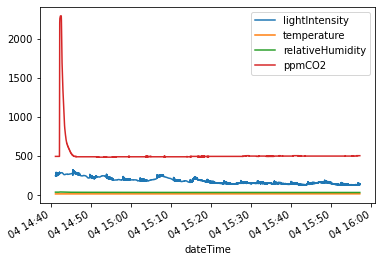

In [34]:
# simply plot all columns/series in the data frame
# the timestamp column is automatically taken for the x-axis and a legend is printed
df.plot()

In [ ]:
# joker, 2022-02-07: there you go.
# now, it's about separating the data in different plots or add different y-axes
# for the different data sets you could try to work with a for loop to read the data as df_1... df_5
# and plot it in one big plot, setting the x-axis appropriately
# or the easier way (totally acceptable): remove the header lines in your own single data file and take it as one data set
# to be able to concentrate on adding someone else's data set